In [1]:
import numpy as np
import pickle
import pandas as pd
import datetime
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import performance_metrics

prophet_final = pickle.load(open('Models/Prophet_Final.pkl', 'rb'))
df = pd.read_pickle("Data/Prophet_Forecast_DF.pkl")

In [2]:
def nutritional_breakdown(df, converted_data):

    total_calories = converted_data['Daily_Calories']
    percent_fat = converted_data['Daily_Fat']
    percent_protein = converted_data['Daily_Protein']
    percent_carb = converted_data['Daily_Carbs']
    percent_breakfast = converted_data['Percent_Breakfast']
    percent_lunch = converted_data['Percent_Lunch']
    percent_dinner = converted_data['Percent_Dinner']

    nutrient_breakdown = {
        'Calories_Breakfast': np.mean(df['Calories_Breakfast']),
        'Saturated_Fat_Breakfast': np.mean(df['Saturated_Fat_Breakfast']),
        'Cholesterol_Breakfast': np.mean(df['Cholesterol_Breakfast']),
        'Polyunsaturated_Fat_Breakfast': np.mean(df['Polyunsaturated_Fat_Breakfast']),
        'Monounsaturated_Fat_Breakfast': np.mean(df['Monounsaturated_Fat_Breakfast']),
        'Trans_Fat_Breakfast': np.mean(df['Trans_Fat_Breakfast']),
        'Carbohydrates_(g)_Breakfast': np.mean(df['Carbohydrates_(g)_Breakfast']),
        'Sugar_Breakfast': np.mean(df['Sugar_Breakfast']),
        'Sodium_(mg)_Breakfast': np.mean(df['Sodium_(mg)_Breakfast']),
        'Protein_(g)_Breakfast': np.mean(df['Protein_(g)_Breakfast']),
        'Calories_Lunch': np.mean(df['Calories_Lunch']),
        'Saturated_Fat_Lunch': np.mean(df['Saturated_Fat_Lunch']),
        'Polyunsaturated_Fat_Lunch': np.mean(df['Polyunsaturated_Fat_Lunch']),
        'Monounsaturated_Fat_Lunch': np.mean(df['Monounsaturated_Fat_Lunch']),
        'Trans_Fat_Lunch': np.mean(df['Trans_Fat_Lunch']),
        'Cholesterol_Lunch': np.mean(df['Cholesterol_Lunch']),
        'Sodium_(mg)_Lunch': np.mean(df['Sodium_(mg)_Lunch']),
        'Carbohydrates_(g)_Lunch': np.mean(df['Carbohydrates_(g)_Lunch']),
        'Sugar_Lunch': np.mean(df['Sugar_Lunch']),
        'Protein_(g)_Lunch': np.mean(df['Protein_(g)_Lunch']),
        'Calories_Dinner': np.mean(df['Calories_Dinner']),
        'Saturated_Fat_Dinner': np.mean(df['Saturated_Fat_Dinner']),
        'Polyunsaturated_Fat_Dinner': np.mean(df['Polyunsaturated_Fat_Dinner']),
        'Monounsaturated_Fat_Dinner': np.mean(df['Monounsaturated_Fat_Dinner']),
        'Trans_Fat_Dinner': np.mean(df['Trans_Fat_Dinner']),
        'Cholesterol_Dinner': np.mean(df['Cholesterol_Dinner']),
        'Sodium_(mg)_Dinner': np.mean(df['Sodium_(mg)_Dinner']),
        'Carbohydrates_(g)_Dinner': np.mean(df['Carbohydrates_(g)_Dinner']),
        'Sugar_Dinner': np.mean(df['Sugar_Dinner']),
        'Protein_(g)_Dinner': np.mean(df['Protein_(g)_Dinner'])
    }

    cals_per_g_fat = 9
    cals_per_g_protein = 4
    cals_per_g_carb = 4
    
    percent_breakfast = percent_breakfast / 100
    percent_lunch = percent_lunch / 100
    percent_dinner = percent_dinner / 100
    
    percent_fat = percent_fat / 100
    percent_protein = percent_protein / 100
    percent_carb = percent_carb / 100

    breakfast_multiplier = percent_breakfast / np.mean(df['Calories_Breakfast'] / df['Calories'])
    lunch_multiplier = percent_lunch / np.mean(df['Calories_Lunch'] / df['Calories'])
    dinner_multiplier = percent_dinner / np.mean(df['Calories_Dinner'] / df['Calories'])

    g_fat = total_calories * percent_fat / cals_per_g_fat
    g_protein = total_calories * percent_protein / cals_per_g_protein
    g_carbs = total_calories * percent_carb / cals_per_g_carb

    fat_multiplier = g_fat / np.mean(df['Fat (g)'])
    protein_multiplier = g_protein / np.mean(df['Protein (g)'])
    carb_multiplier = g_carbs / np.mean(df['Carbohydrates (g)'])

    fat_breakdown = {}

    fat_columns = ['Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
                   'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
                   'Trans_Fat_Breakfast', 'Sodium_(mg)_Breakfast', 'Saturated_Fat_Lunch',
                   'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch', 'Sodium_(mg)_Lunch',
                   'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
                   'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner', 'Sodium_(mg)_Dinner']

    for i in range(len(fat_columns)):
        if i <= 5:
            fat_breakdown[fat_columns[i]] = nutrient_breakdown[fat_columns[i]] * \
                fat_multiplier * percent_breakfast
        elif i <= 11:
            fat_breakdown[fat_columns[i]] = nutrient_breakdown[fat_columns[i]] * \
                fat_multiplier * percent_lunch
        else:
            fat_breakdown[fat_columns[i]] = nutrient_breakdown[fat_columns[i]] * \
                fat_multiplier * percent_dinner

    protein_breakdown = {}

    protein_columns = ['Protein_(g)_Breakfast', 'Protein_(g)_Lunch', 'Protein_(g)_Dinner']

    protein_breakdown['Protein_(g)_Breakfast'] = nutrient_breakdown['Protein_(g)_Breakfast'] * \
        protein_multiplier * percent_breakfast
    protein_breakdown['Protein_(g)_Lunch'] = nutrient_breakdown['Protein_(g)_Lunch'] * \
        protein_multiplier * percent_lunch
    protein_breakdown['Protein_(g)_Dinner'] = nutrient_breakdown['Protein_(g)_Dinner'] * \
        protein_multiplier * percent_dinner

    carb_breakdown = {}

    carb_columns = ['Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast', 'Carbohydrates_(g)_Lunch',
                    'Sugar_Lunch', 'Carbohydrates_(g)_Dinner', 'Sugar_Dinner']

    for i in range(len(carb_columns)):
        if i <= 1:
            carb_breakdown[carb_columns[i]] = nutrient_breakdown[carb_columns[i]] * \
                carb_multiplier * percent_breakfast
        elif i <= 3:
            carb_breakdown[carb_columns[i]] = nutrient_breakdown[carb_columns[i]] * \
                carb_multiplier * percent_lunch
        else:
            carb_breakdown[carb_columns[i]] = nutrient_breakdown[carb_columns[i]] * \
                carb_multiplier * percent_dinner

    calories_breakdown = {}

    calories_columns = ['Calories_Breakfast', 'Calories_Lunch', 'Calories_Dinner']

    calories_breakdown['Calories_Breakfast'] = total_calories * percent_breakfast
    calories_breakdown['Calories_Lunch'] = total_calories * percent_lunch
    calories_breakdown['Calories_Dinner'] = total_calories * percent_dinner

    return fat_breakdown, protein_breakdown, carb_breakdown, calories_breakdown

In [3]:
def get_features(converted_data, fat_breakdown, protein_breakdown, carb_breakdown, calorie_breakdown):
    minutes_sedentary = (1440 - converted_data['Minutes_Lightly_Active'] -
                         converted_data['Minutes_Fairly_Active'] - converted_data['Minutes_Very_Active'])

    features = {
        'Steps': converted_data['Steps'],
        'Minutes_Sedentary': minutes_sedentary,
        'Minutes_Lightly_Active': converted_data['Minutes_Lightly_Active'],
        'Minutes_Fairly_Active': converted_data['Minutes_Fairly_Active'],
        'Minutes_Very_Active': converted_data['Minutes_Very_Active'],
        'Calories_Breakfast': calorie_breakdown['Calories_Breakfast'],
        'Saturated_Fat_Breakfast': fat_breakdown['Saturated_Fat_Breakfast'],
        'Cholesterol_Breakfast': fat_breakdown['Cholesterol_Breakfast'],
        'Polyunsaturated_Fat_Breakfast': fat_breakdown['Polyunsaturated_Fat_Breakfast'],
        'Monounsaturated_Fat_Breakfast': fat_breakdown['Monounsaturated_Fat_Breakfast'],
        'Trans_Fat_Breakfast': fat_breakdown['Trans_Fat_Breakfast'],
        'Carbohydrates_(g)_Breakfast': carb_breakdown['Carbohydrates_(g)_Breakfast'],
        'Sugar_Breakfast': carb_breakdown['Sugar_Breakfast'],
        'Sodium_(mg)_Breakfast': fat_breakdown['Sodium_(mg)_Breakfast'],
        'Protein_(g)_Breakfast': protein_breakdown['Protein_(g)_Breakfast'],
        'Calories_Lunch': calorie_breakdown['Calories_Lunch'],
        'Saturated_Fat_Lunch': fat_breakdown['Saturated_Fat_Lunch'],
        'Polyunsaturated_Fat_Lunch': fat_breakdown['Polyunsaturated_Fat_Lunch'],
        'Monounsaturated_Fat_Lunch': fat_breakdown['Monounsaturated_Fat_Lunch'],
        'Trans_Fat_Lunch': fat_breakdown['Trans_Fat_Lunch'],
        'Cholesterol_Lunch': fat_breakdown['Cholesterol_Lunch'],
        'Sodium_(mg)_Lunch': fat_breakdown['Sodium_(mg)_Lunch'],
        'Carbohydrates_(g)_Lunch': carb_breakdown['Carbohydrates_(g)_Lunch'],
        'Sugar_Lunch': carb_breakdown['Sugar_Lunch'],
        'Protein_(g)_Lunch': protein_breakdown['Protein_(g)_Lunch'],
        'Calories_Dinner': calorie_breakdown['Calories_Dinner'],
        'Saturated_Fat_Dinner': fat_breakdown['Saturated_Fat_Dinner'],
        'Polyunsaturated_Fat_Dinner': fat_breakdown['Polyunsaturated_Fat_Dinner'],
        'Monounsaturated_Fat_Dinner': fat_breakdown['Monounsaturated_Fat_Dinner'],
        'Trans_Fat_Dinner': fat_breakdown['Trans_Fat_Dinner'],
        'Cholesterol_Dinner': fat_breakdown['Cholesterol_Dinner'],
        'Sodium_(mg)_Dinner': fat_breakdown['Sodium_(mg)_Dinner'],
        'Carbohydrates_(g)_Dinner': carb_breakdown['Carbohydrates_(g)_Dinner'],
        'Sugar_Dinner': carb_breakdown['Sugar_Dinner'],
        'Protein_(g)_Dinner': protein_breakdown['Protein_(g)_Dinner']
    }

    return features

In [109]:
converted_data = {
  'Steps': 10000,
  'Minutes_Lightly_Active': 100,
  'Minutes_Fairly_Active': 60,
  'Minutes_Very_Active': 20,
  'Daily_Calories': 2000,
  'Percent_Breakfast': 20,
  'Percent_Lunch': 40,
  'Percent_Dinner': 40,
  'Daily_Fat': 35,
  'Daily_Carbs': 25,
  'Daily_Protein': 40,
  'Date': '2018-10-01',
  'american': 1.0,
  'italian': 0.0,
  'chinese': 0.0,
  'mexican': 0.0,
  'japanese': 1.0,
  'greek': 1.0,
  'mediterranean': 0.0,
  'barbecue': 0.0,
  'german': 0.0
}

fat_breakdown, protein_breakdown, carb_breakdown, calorie_breakdown = nutritional_breakdown(
        df, converted_data)

fat_breakdown

{'Cholesterol_Breakfast': 47.369361732230225,
 'Cholesterol_Dinner': 59.96923896477862,
 'Cholesterol_Lunch': 52.72309612980455,
 'Monounsaturated_Fat_Breakfast': 1.0669980021649492,
 'Monounsaturated_Fat_Dinner': 1.7396704462301207,
 'Monounsaturated_Fat_Lunch': 1.6779763911159176,
 'Polyunsaturated_Fat_Breakfast': 0.44931076775543205,
 'Polyunsaturated_Fat_Dinner': 0.8091658363152215,
 'Polyunsaturated_Fat_Lunch': 1.3285957268035444,
 'Saturated_Fat_Breakfast': 1.7163035040532133,
 'Saturated_Fat_Dinner': 4.683843656475089,
 'Saturated_Fat_Lunch': 3.845697006801862,
 'Sodium_(mg)_Breakfast': 189.10818245528924,
 'Sodium_(mg)_Dinner': 583.7117425390015,
 'Sodium_(mg)_Lunch': 623.8489537824153,
 'Trans_Fat_Breakfast': 0.057035880857512405,
 'Trans_Fat_Dinner': 0.15129029103265051,
 'Trans_Fat_Lunch': 0.036933843098355235}

In [110]:
features = get_features(converted_data, fat_breakdown, protein_breakdown,
                            carb_breakdown, calorie_breakdown)

features

{'Calories_Breakfast': 400.0,
 'Calories_Dinner': 800.0,
 'Calories_Lunch': 800.0,
 'Carbohydrates_(g)_Breakfast': 7.622350343519052,
 'Carbohydrates_(g)_Dinner': 23.595488384569848,
 'Carbohydrates_(g)_Lunch': 24.440668196871435,
 'Cholesterol_Breakfast': 47.369361732230225,
 'Cholesterol_Dinner': 59.96923896477862,
 'Cholesterol_Lunch': 52.72309612980455,
 'Minutes_Fairly_Active': 60,
 'Minutes_Lightly_Active': 100,
 'Minutes_Sedentary': 1260,
 'Minutes_Very_Active': 20,
 'Monounsaturated_Fat_Breakfast': 1.0669980021649492,
 'Monounsaturated_Fat_Dinner': 1.7396704462301207,
 'Monounsaturated_Fat_Lunch': 1.6779763911159176,
 'Polyunsaturated_Fat_Breakfast': 0.44931076775543205,
 'Polyunsaturated_Fat_Dinner': 0.8091658363152215,
 'Polyunsaturated_Fat_Lunch': 1.3285957268035444,
 'Protein_(g)_Breakfast': 11.091942365553132,
 'Protein_(g)_Dinner': 42.45146186529735,
 'Protein_(g)_Lunch': 39.57893389150156,
 'Saturated_Fat_Breakfast': 1.7163035040532133,
 'Saturated_Fat_Dinner': 4.6838436

In [111]:
def prophet_forecast_weight(features, df, periods, date, cap=None, floor=170):
    future = prophet_final.make_future_dataframe(periods=periods)
    future['floor'] = 170
    
    steps_regressors_df = df[['Date','Steps','Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']]
    
    columns = ['Steps','Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']

    future = future.merge(steps_regressors_df, left_on='ds', right_on='Date', how='left')
    
    for i in columns:
        future[i].iloc[-periods:] = features[i]
        
    forecast = prophet_final.predict(future)
    
    predicted_weight = np.round(forecast[forecast['ds'] == date]['yhat'].values[0],2)
    predicted_weight_upper = np.round(forecast[forecast['ds'] == date]['yhat_upper'].values[0],2)
    predicted_weight_lower = np.round(forecast[forecast['ds'] == date]['yhat_lower'].values[0],2)
    
    result = {
        
        'predicted_weight':predicted_weight,
        'predicted_weight_upper': predicted_weight_upper,
        'predicted_weight_lower': predicted_weight_lower
        
    }
        
    return result

In [112]:
prophet_forecast_weight(features, df, periods=90, date=converted_data['Date'])

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


{'predicted_weight': 171.21,
 'predicted_weight_lower': 168.46,
 'predicted_weight_upper': 173.87}

In [185]:
def recipe_cosine_similarity(ideal_recipe_vec, new_recipe_vec):
    ## ideal_recipe_vec == array of [ideal_meal_cals, ideal_meal_fat, ideal_meal_protein, ideal_meal_carb]
    ## new_recipe_vec == array of [new_meal_cals, new_meal_fat, new_meal_protein, new_meal_carb]
    return np.dot(ideal_recipe_vec, new_recipe_vec) / np.sqrt(np.dot(ideal_recipe_vec, ideal_recipe_vec) * np.dot(new_recipe_vec, new_recipe_vec))

def get_closest_recipes(ideal_recipe_vec, new_recipe_vecs):
    recipe_similarities = []
    for i in new_recipe_vecs:
        new_recipe_vec = i[2]
        recipe_info = (str(new_recipe_vec[0]) + ' Calories', str(new_recipe_vec[1]) + ' g Fat', str(new_recipe_vec[2]) + ' g Protein', str(new_recipe_vec[3]) + ' g Carbs')
        cosine_sim = recipe_cosine_similarity(ideal_recipe_vec[1:], new_recipe_vec[1:])
        if np.isnan(cosine_sim) == False:
            recipe_similarities.append([i[1], recipe_info, i[3], i[4], cosine_sim])
    
    recipe_similarities = sorted(recipe_similarities, key=lambda x: x[3], reverse=True)
    
    return recipe_similarities[:5]

def food_recommendations(df, converted_data):
    
    cuisine_list = [key for key, value in converted_data.items() if value != 0.0]
    
    total_calories = converted_data['Daily_Calories']
    percent_fat = converted_data['Daily_Fat']
    percent_protein = converted_data['Daily_Protein']
    percent_carb = converted_data['Daily_Carbs']
    percent_breakfast = converted_data['Percent_Breakfast']
    percent_lunch = converted_data['Percent_Lunch']
    percent_dinner = converted_data['Percent_Dinner']
    
    breakfast_df = df[df['course'].str.contains('breakfast') & df['cuisine'].str.contains('|'.join(cuisine_list))]
    lunch_df = df[df['course'].str.contains('lunch') & df['cuisine'].str.contains('|'.join(cuisine_list))]
    dinner_df = df[df['course'].str.contains('main dishes') & df['cuisine'].str.contains('|'.join(cuisine_list))]
    
    cals_per_g_fat = 9
    cals_per_g_protein = 4
    cals_per_g_carb = 4

    percent_breakfast = percent_breakfast / 100
    percent_lunch = percent_lunch / 100
    percent_dinner = percent_dinner / 100
    
    calories_breakdown = {}

    calories_columns = ['Calories_Breakfast', 'Calories_Lunch', 'Calories_Dinner']

    calories_breakdown['Calories_Breakfast'] = total_calories * percent_breakfast
    calories_breakdown['Calories_Lunch'] = total_calories * percent_lunch
    calories_breakdown['Calories_Dinner'] = total_calories * percent_dinner
    
    breakfast_df = df[df['course'].str.contains('breakfast') & df['cuisine'].str.contains('|'.join(cuisine_list)) & ((calories_breakdown['Calories_Breakfast'] - 75) < df['energy_kcal']) & (df['energy_kcal'] < (calories_breakdown['Calories_Breakfast'] + 75))]
    lunch_df = df[df['course'].str.contains('lunch') & df['cuisine'].str.contains('|'.join(cuisine_list)) & ((calories_breakdown['Calories_Lunch'] - 75) < df['energy_kcal']) & (df['energy_kcal'] < (calories_breakdown['Calories_Lunch'] + 75))]
    dinner_df = df[df['course'].str.contains('main dishes') & df['cuisine'].str.contains('|'.join(cuisine_list)) & ((calories_breakdown['Calories_Dinner'] - 75) < df['energy_kcal']) & (df['energy_kcal'] < (calories_breakdown['Calories_Dinner'] + 75))]

    percent_fat = percent_fat / 100
    percent_protein = percent_protein / 100
    percent_carb = percent_carb / 100
    
    breakfast_recipes = []
    
    g_fat = total_calories * percent_fat / cals_per_g_fat
    g_protein = total_calories * percent_protein / cals_per_g_protein
    g_carbs = total_calories * percent_carb / cals_per_g_carb
    
    g_fat_breakfast = g_fat * percent_breakfast
    g_fat_lunch = g_fat * percent_lunch
    g_fat_dinner = g_fat * percent_dinner
    
    g_protein_breakfast = g_protein * percent_breakfast
    g_protein_lunch = g_protein * percent_lunch
    g_protein_dinner = g_protein * percent_dinner
    
    g_carbs_breakfast = g_carbs * percent_breakfast
    g_carbs_lunch = g_carbs * percent_lunch
    g_carbs_dinner = g_carbs * percent_dinner
    
    ideal_breakfast_recipe_vec = [calories_breakdown['Calories_Breakfast'], g_fat_breakfast, g_protein_breakfast, g_carbs_breakfast]
    ideal_lunch_recipe_vec = [calories_breakdown['Calories_Lunch'], g_fat_lunch, g_protein_lunch, g_carbs_lunch]
    ideal_dinner_recipe_vec = [calories_breakdown['Calories_Dinner'], g_fat_dinner, g_protein_dinner, g_carbs_dinner]
    
    breakfast_recipe_vecs = [(index, row['name'], row[['energy_kcal', 'fat_g', 'protein_g', 'carbs_g']].values, row['source_url'], row['recipe_image']) for index, row in breakfast_df.iterrows()]
    lunch_recipe_vecs = [(index, row['name'], row[['energy_kcal', 'fat_g', 'protein_g', 'carbs_g']].values, row['source_url'], row['recipe_image']) for index, row in lunch_df.iterrows()]
    dinner_recipe_vecs = [(index, row['name'], row[['energy_kcal', 'fat_g', 'protein_g', 'carbs_g']].values, row['source_url'], row['recipe_image']) for index, row in dinner_df.iterrows()]

    breakfast_recipes = get_closest_recipes(ideal_breakfast_recipe_vec, breakfast_recipe_vecs)
    lunch_recipes = get_closest_recipes(ideal_lunch_recipe_vec, lunch_recipe_vecs)
    dinner_recipes = get_closest_recipes(ideal_dinner_recipe_vec, dinner_recipe_vecs)

    return breakfast_recipes, lunch_recipes, dinner_recipes   

In [186]:
yummly_df = pd.read_pickle("Data/Yummly_Data/Yummly_DF.pkl")

In [187]:
# cuisine_list = ['american', 'japanese', 'greek']

In [188]:
food_recommendations(yummly_df, converted_data)

([['Southern Style Country Sausage Gravy',
   ('389.52 Calories', '29.84 g Fat', '17.83 g Protein', '11.65 g Carbs'),
   'http://carrieshomecooking.com/country-sausage-gravy/',
   'https://lh3.googleusercontent.com/wUruFHdtBTHvSHE4atDd3sEh9gXCyePq9wzCkytyEBBHWcblCEurJ25nmKrtzzERnCDMGdVzmmMZPa--dvdwIA=s360',
   0.80652993892996],
  ['Greek-style Omelette',
   ('354.01 Calories', '29.81 g Fat', '17.91 g Protein', '4.95 g Carbs'),
   'http://www.themediterraneandietitian.com/recipe/greek-style-omelette/',
   'https://lh3.googleusercontent.com/WY9kN3_F1i7s3bUYJyxSDj1jbL1gORbu9hxa5Uj5-sde3wQno8tFMp7q-hmZvVBMc2ILvQZT8C3p1tZ3YdXGlis=s360',
   0.7473220039381573],
  ['Spinach Feta Quiche with Flakey Phyllo Dough Crust',
   ('329.93 Calories', '20.4 g Fat', '13.62 g Protein', '23.26 g Carbs'),
   'http://www.wellplated.com/spinach-feta-quiche/',
   'https://lh3.googleusercontent.com/0Cf1QG1-iLjNS9mGKKZLZcySW3yUMmYO5Hx7_WW9wxGh2bOxyVIqq-irJQod9EVekCWzF8sxuABqBCYSfEHw=s360',
   0.8598246794949054

In [198]:
breakfast_recipes, lunch_recipes, dinner_recipes = food_recommendations(yummly_df, converted_data)
breakfast_recipe_names = [i[0] for i in breakfast_recipes]
breakfast_recipe_urls = [i[1] for i in breakfast_recipes]
breakfast_recipe_images = [i[2] for i in breakfast_recipes]

lunch_recipe_names = [i[0] for i in lunch_recipes]
lunch_recipe_urls = [i[1] for i in lunch_recipes]
lunch_recipe_images = [i[2] for i in lunch_recipes]

dinner_recipe_names = [i[0] for i in dinner_recipes]
dinner_recipe_urls = [i[1] for i in dinner_recipes]
dinner_recipe_images = [i[2] for i in dinner_recipes]

In [199]:
breakfast_recipe_names

['Southern Style Country Sausage Gravy',
 'Greek-style Omelette',
 'Spinach Feta Quiche with Flakey Phyllo Dough Crust',
 'Hearty Pancakes']

In [200]:
breakfast_recipes

[['Southern Style Country Sausage Gravy',
  ('389.52 Calories', '29.84 g Fat', '17.83 g Protein', '11.65 g Carbs'),
  'http://carrieshomecooking.com/country-sausage-gravy/',
  'https://lh3.googleusercontent.com/wUruFHdtBTHvSHE4atDd3sEh9gXCyePq9wzCkytyEBBHWcblCEurJ25nmKrtzzERnCDMGdVzmmMZPa--dvdwIA=s360',
  0.80652993892996],
 ['Greek-style Omelette',
  ('354.01 Calories', '29.81 g Fat', '17.91 g Protein', '4.95 g Carbs'),
  'http://www.themediterraneandietitian.com/recipe/greek-style-omelette/',
  'https://lh3.googleusercontent.com/WY9kN3_F1i7s3bUYJyxSDj1jbL1gORbu9hxa5Uj5-sde3wQno8tFMp7q-hmZvVBMc2ILvQZT8C3p1tZ3YdXGlis=s360',
  0.7473220039381573],
 ['Spinach Feta Quiche with Flakey Phyllo Dough Crust',
  ('329.93 Calories', '20.4 g Fat', '13.62 g Protein', '23.26 g Carbs'),
  'http://www.wellplated.com/spinach-feta-quiche/',
  'https://lh3.googleusercontent.com/0Cf1QG1-iLjNS9mGKKZLZcySW3yUMmYO5Hx7_WW9wxGh2bOxyVIqq-irJQod9EVekCWzF8sxuABqBCYSfEHw=s360',
  0.8598246794949054],
 ['Hearty Pa

In [201]:
breakfast_recipe_info = [i[0:3] for i in breakfast_recipes]
breakfast_recipe_info

[['Southern Style Country Sausage Gravy',
  ('389.52 Calories', '29.84 g Fat', '17.83 g Protein', '11.65 g Carbs'),
  'http://carrieshomecooking.com/country-sausage-gravy/'],
 ['Greek-style Omelette',
  ('354.01 Calories', '29.81 g Fat', '17.91 g Protein', '4.95 g Carbs'),
  'http://www.themediterraneandietitian.com/recipe/greek-style-omelette/'],
 ['Spinach Feta Quiche with Flakey Phyllo Dough Crust',
  ('329.93 Calories', '20.4 g Fat', '13.62 g Protein', '23.26 g Carbs'),
  'http://www.wellplated.com/spinach-feta-quiche/'],
 ['Hearty Pancakes',
  ('349.19 Calories', '9.36 g Fat', '9.14 g Protein', '60.91 g Carbs'),
  'http://www.health.com/health/recipe/0,,10000000780384,00.html']]

In [202]:
def prophet_forecast_weight(features, df, periods, date, cap=None, floor=170):
    future = prophet_final.make_future_dataframe(periods=periods)
    future['floor'] = 170
    
    steps_regressors_df = df[['Date','Steps','Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']]
    
    columns = ['Steps','Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']

    future = future.merge(steps_regressors_df, left_on='ds', right_on='Date', how='left')
    
    for i in columns:
        future[i].iloc[-periods:] = features[i]
        
    forecast = prophet_final.predict(future)
    
    predicted_weight = np.round(forecast[forecast['ds'] == date]['yhat'].values[0],2)
    predicted_weight_upper = np.round(forecast[forecast['ds'] == date]['yhat_upper'].values[0],2)
    predicted_weight_lower = np.round(forecast[forecast['ds'] == date]['yhat_lower'].values[0],2)
    
    result = {
        
        'predicted_weight':predicted_weight,
        'predicted_weight_upper': predicted_weight_upper,
        'predicted_weight_lower': predicted_weight_lower
        
    }
        
    return predicted_weight, predicted_weight_upper, predicted_weight_lower

In [203]:
from PIL import Image
import urllib
from io import BytesIO

def get_image(image):
    file = BytesIO(urllib.request.urlopen(breakfast_img).read())
    img = Image.open(file)
    return img

In [204]:
def flask_output(features, df, yummly_df, periods=90, date=converted_data['Date']):
    
    predicted_weight, predicted_weight_upper, predicted_weight_lower = prophet_forecast_weight(features, df, periods=90, date=converted_data['Date'])
    
    breakfast_recipes, lunch_recipes, dinner_recipes = food_recommendations(yummly_df, converted_data)
    
    breakfast_recipe_names = [i[0] for i in breakfast_recipes]
    lunch_recipe_names = [i[0] for i in lunch_recipes]
    dinner_recipe_names = [i[0] for i in dinner_recipes]
    
    breakfast_recipe_urls = [i[1] for i in breakfast_recipes]
    lunch_recipe_urls = [i[1] for i in lunch_recipes]
    dinner_recipe_urls = [i[1] for i in dinner_recipes]
    
    first_breakfast_recipe_name, first_breakfast_recipe_url = breakfast_recipe_names[0], breakfast_recipe_urls[0]
    second_breakfast_recipe_name, second_breakfast_recipe_url = breakfast_recipe_names[1], breakfast_recipe_urls[1]
    third_breakfast_recipe_name, third_breakfast_recipe_url = breakfast_recipe_names[2], breakfast_recipe_urls[2]
    fourth_breakfast_recipe_name, fourth_breakfast_recipe_url = breakfast_recipe_names[3], breakfast_recipe_urls[3]
    fifth_breakfast_recipe_name, fifth_breakfast_recipe_url = breakfast_recipe_names[4], breakfast_recipe_urls[4]
    
    first_lunch_recipe_name, first_lunch_recipe_url = lunch_recipe_names[0], lunch_recipe_urls[0]
    second_lunch_recipe_name, second_lunch_recipe_url = lunch_recipe_names[1], lunch_recipe_urls[1]
    third_lunch_recipe_name, third_lunch_recipe_url = lunch_recipe_names[2], lunch_recipe_urls[2]
    fourth_lunch_recipe_name, fourth_lunch_recipe_url = lunch_recipe_names[3], lunch_recipe_urls[3]
    fifth_lunch_recipe_name, fifth_lunch_recipe_url = lunch_recipe_names[4], lunch_recipe_urls[4]
    
    first_dinner_recipe_name, first_dinner_recipe_url = dinner_recipe_names[0], dinner_recipe_urls[0]
    second_dinner_recipe_name, second_dinner_recipe_url = dinner_recipe_names[1], dinner_recipe_urls[1]
    third_dinner_recipe_name, third_dinner_recipe_url = dinner_recipe_names[2], dinner_recipe_urls[2]
    fourth_dinner_recipe_name, fourth_dinner_recipe_url = dinner_recipe_names[3], dinner_recipe_urls[3]
    fifth_dinner_recipe_name, fifth_dinner_recipe_url = dinner_recipe_names[4], dinner_recipe_urls[4]
    
    
    breakfast_image = str(get_image(random.choice([i[2] for i in breakfast_recipes])))
    lunch_image = str(get_image(random.choice([i[2] for i in lunch_recipes])))
    dinner_image = str(get_image(random.choice([i[2] for i in dinner_recipes])))
    
    
    result = {
        
        'predicted_weight': predicted_weight,
        'predicted_weight_upper': predicted_weight_upper,
        'predicted_weight_lower': predicted_weight_lower,
        'breakfast_image': breakfast_image,
        'lunch_image': lunch_image,
        'dinner_image': dinner_image,
        'first_breakfast_recipe_name': first_breakfast_recipe_name,
        'second_breakfast_recipe_name': second_breakfast_recipe_name,
        'third_breakfast_recipe_name': third_breakfast_recipe_name,
        'fourth_breakfast_recipe_name': fourth_breakfast_recipe_name,
        'fifth_breakfast_recipe_name': fifth_breakfast_recipe_name,
        'first_breakfast_recipe_url': first_breakfast_recipe_url,
        'second_breakfast_recipe_url': second_breakfast_recipe_url,
        'third_breakfast_recipe_url': third_breakfast_recipe_url,
        'fourth_breakfast_recipe_url': fourth_breakfast_recipe_url,
        'fifth_breakfast_recipe_url': fifth_breakfast_recipe_url,
        'first_lunch_recipe_name': first_lunch_recipe_name,
        'second_lunch_recipe_name': second_lunch_recipe_name,
        'third_lunch_recipe_name': third_lunch_recipe_name,
        'fourth_lunch_recipe_name': fourth_lunch_recipe_name,
        'fifth_lunch_recipe_name': fifth_lunch_recipe_name,
        'first_lunch_recipe_url': first_lunch_recipe_url,
        'second_lunch_recipe_url': second_lunch_recipe_url,
        'third_lunch_recipe_url': third_lunch_recipe_url,
        'fourth_lunch_recipe_url': fourth_lunch_recipe_url,
        'fifth_lunch_recipe_url': fifth_lunch_recipe_url,
        'first_dinner_recipe_name': first_dinner_recipe_name,
        'second_dinner_recipe_name': second_dinner_recipe_name,
        'third_dinner_recipe_name':third_dinner_recipe_name,
        'fourth_dinner_recipe_name': fourth_dinner_recipe_name,
        'fifth_dinner_recipe_name': fifth_dinner_recipe_name,
        'first_dinner_recipe_url': first_dinner_recipe_url,
        'second_dinner_recipe_url': second_dinner_recipe_url,
        'third_dinner_recipe_url': third_dinner_recipe_url,
        'fourth_dinner_recipe_url': fourth_dinner_recipe_url,
        'fifth_dinner_recipe_url': fifth_dinner_recipe_url
        
    }
    
    return result

In [205]:
flask_output(features, df, yummly_df, periods=90, date=converted_data['Date'])

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


IndexError: list index out of range

In [ ]:
trial = flask_output(features, df, yummly_df, periods=90, date=converted_data['Date'])

trial

In [ ]:
breakfast_img = trial['breakfast_image']

breakfast_img

In [146]:
from PIL import Image
import urllib
from io import BytesIO

file = BytesIO(urllib.request.urlopen(breakfast_img).read())
img = Image.open(file)

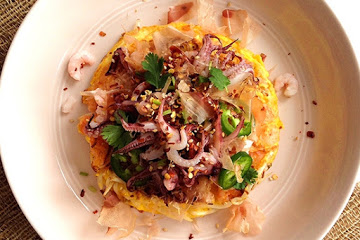

In [147]:
img

In [ ]:
from PIL import Image
import urllib
from io import BytesIO

def get_image(image):
    file = BytesIO(urllib.request.urlopen(breakfast_img).read())
    img = Image.open(file)
    return img

In [ ]:
breakfast_recipe_names = [i[0] for i in breakfast_recipes]
lunch_recipe_names = [i[0] for i in lunch_recipes]
dinner_recipe_names = [i[0] for i in dinner_recipes]

breakfast_recipe_info = [i[1] for i in breakfast_recipes]
lunch_recipe_info = [i[1] for i in lunch_recipes]
dinner_recipe_info = [i[1] for i in dinner_recipes]

breakfast_recipe_urls = [i[2] for i in breakfast_recipes]
lunch_recipe_urls = [i[2] for i in lunch_recipes]
dinner_recipe_urls = [i[2] for i in dinner_recipes]



first_breakfast_recipe_name, first_breakfast_recipe_info, first_breakfast_recipe_url = breakfast_recipe_names[
    0], breakfast_recipe_urls[0]
second_breakfast_recipe_name, second_breakfast_recipe_url = breakfast_recipe_names[
    1], breakfast_recipe_urls[1]
third_breakfast_recipe_name, third_breakfast_recipe_url = breakfast_recipe_names[
    2], breakfast_recipe_urls[2]
fourth_breakfast_recipe_name, fourth_breakfast_recipe_url = breakfast_recipe_names[
    3], breakfast_recipe_urls[3]
fifth_breakfast_recipe_name, fifth_breakfast_recipe_url = breakfast_recipe_names[
    4], breakfast_recipe_urls[4]

first_lunch_recipe_name, first_lunch_recipe_url = lunch_recipe_names[0], lunch_recipe_urls[0]
second_lunch_recipe_name, second_lunch_recipe_url = lunch_recipe_names[1], lunch_recipe_urls[1]
third_lunch_recipe_name, third_lunch_recipe_url = lunch_recipe_names[2], lunch_recipe_urls[2]
fourth_lunch_recipe_name, fourth_lunch_recipe_url = lunch_recipe_names[3], lunch_recipe_urls[3]
fifth_lunch_recipe_name, fifth_lunch_recipe_url = lunch_recipe_names[4], lunch_recipe_urls[4]

first_dinner_recipe_name, first_dinner_recipe_url = dinner_recipe_names[0], dinner_recipe_urls[0]
second_dinner_recipe_name, second_dinner_recipe_url = dinner_recipe_names[1], dinner_recipe_urls[1]
third_dinner_recipe_name, third_dinner_recipe_url = dinner_recipe_names[2], dinner_recipe_urls[2]
fourth_dinner_recipe_name, fourth_dinner_recipe_url = dinner_recipe_names[3], dinner_recipe_urls[3]
fifth_dinner_recipe_name, fifth_dinner_recipe_url = dinner_recipe_names[4], dinner_recipe_urls[4]

In [216]:
ordinal_list = ['first', 'second', 'third', 'fourth', 'fifth']
meal_name = 'breakfast'

def get_recipe_info(recipe_list, ordinal_list, meal_name):
    d={}
    d["{0}_recipe_names".format(meal_name)] = [i[0] for i in recipe_list]
    d["{0}_recipe_info".format(meal_name)] = [i[1] for i in recipe_list]
    d["{0}_recipe_urls".format(meal_name)] = [i[2] for i in recipe_list]
    for index, ordinal in enumerate(ordinal_list):
        try:
            d["{0}_{1}_recipe_name".format(ordinal, meal_name)] = d["{0}_recipe_names".format(meal_name)][index]
            d["{0}_{1}_recipe_info".format(ordinal, meal_name)] = d["{0}_recipe_info".format(meal_name)][index]
            d["{0}_{1}_recipe_url".format(ordinal, meal_name)] = d["{0}_recipe_urls".format(meal_name)][index]
        except:
            d["{0}_{1}_recipe_name".format(ordinal, meal_name)] = 'More recipes coming soon!'
            d["{0}_{1}_recipe_name".format(ordinal, meal_name)] = ''
            d["{0}_{1}_recipe_name".format(ordinal, meal_name)] = ''
    return d

In [217]:
get_recipe_info(breakfast_recipes, ordinal_list, meal_name)

{'breakfast_recipe_info': [('389.52 Calories',
   '29.84 g Fat',
   '17.83 g Protein',
   '11.65 g Carbs'),
  ('354.01 Calories', '29.81 g Fat', '17.91 g Protein', '4.95 g Carbs'),
  ('329.93 Calories', '20.4 g Fat', '13.62 g Protein', '23.26 g Carbs'),
  ('349.19 Calories', '9.36 g Fat', '9.14 g Protein', '60.91 g Carbs')],
 'breakfast_recipe_names': ['Southern Style Country Sausage Gravy',
  'Greek-style Omelette',
  'Spinach Feta Quiche with Flakey Phyllo Dough Crust',
  'Hearty Pancakes'],
 'breakfast_recipe_urls': ['http://carrieshomecooking.com/country-sausage-gravy/',
  'http://www.themediterraneandietitian.com/recipe/greek-style-omelette/',
  'http://www.wellplated.com/spinach-feta-quiche/',
  'http://www.health.com/health/recipe/0,,10000000780384,00.html'],
 'fifth_breakfast_recipe_name': '',
 'first_breakfast_recipe_info': ('389.52 Calories',
  '29.84 g Fat',
  '17.83 g Protein',
  '11.65 g Carbs'),
 'first_breakfast_recipe_name': 'Southern Style Country Sausage Gravy',
 'fir

In [209]:
breakfast_recipes

[['Southern Style Country Sausage Gravy',
  ('389.52 Calories', '29.84 g Fat', '17.83 g Protein', '11.65 g Carbs'),
  'http://carrieshomecooking.com/country-sausage-gravy/',
  'https://lh3.googleusercontent.com/wUruFHdtBTHvSHE4atDd3sEh9gXCyePq9wzCkytyEBBHWcblCEurJ25nmKrtzzERnCDMGdVzmmMZPa--dvdwIA=s360',
  0.80652993892996],
 ['Greek-style Omelette',
  ('354.01 Calories', '29.81 g Fat', '17.91 g Protein', '4.95 g Carbs'),
  'http://www.themediterraneandietitian.com/recipe/greek-style-omelette/',
  'https://lh3.googleusercontent.com/WY9kN3_F1i7s3bUYJyxSDj1jbL1gORbu9hxa5Uj5-sde3wQno8tFMp7q-hmZvVBMc2ILvQZT8C3p1tZ3YdXGlis=s360',
  0.7473220039381573],
 ['Spinach Feta Quiche with Flakey Phyllo Dough Crust',
  ('329.93 Calories', '20.4 g Fat', '13.62 g Protein', '23.26 g Carbs'),
  'http://www.wellplated.com/spinach-feta-quiche/',
  'https://lh3.googleusercontent.com/0Cf1QG1-iLjNS9mGKKZLZcySW3yUMmYO5Hx7_WW9wxGh2bOxyVIqq-irJQod9EVekCWzF8sxuABqBCYSfEHw=s360',
  0.8598246794949054],
 ['Hearty Pa

In [243]:
example = {
    'Steps': df.describe()['Steps']['mean'],
    'Minutes_Sedentary': df.describe()['Minutes_Sedentary']['mean'],
    'Minutes_Lightly_Active': df.describe()['Minutes_Lightly_Active']['mean'],
    'Minutes_Fairly_Active': df.describe()['Minutes_Fairly_Active']['mean'],
    'Minutes_Very_Active': df.describe()['Minutes_Very_Active']['mean'],
    'Calories_Breakfast': df.describe()['Calories_Breakfast']['mean'],
    'Saturated_Fat_Breakfast': df.describe()['Saturated_Fat_Breakfast']['mean'],
    'Cholesterol_Breakfast': df.describe()['Cholesterol_Breakfast']['mean'],
    'Polyunsaturated_Fat_Breakfast': df.describe()['Polyunsaturated_Fat_Breakfast']['mean'],
    'Monounsaturated_Fat_Breakfast': df.describe()['Monounsaturated_Fat_Breakfast']['mean'],
    'Trans_Fat_Breakfast': df.describe()['Trans_Fat_Breakfast']['mean'],
    'Carbohydrates_(g)_Breakfast': df.describe()['Carbohydrates_(g)_Breakfast']['mean'],
    'Sugar_Breakfast': df.describe()['Sugar_Breakfast']['mean'],
    'Sodium_(mg)_Breakfast': df.describe()['Sodium_(mg)_Breakfast']['mean'],
    'Protein_(g)_Breakfast': df.describe()['Protein_(g)_Breakfast']['mean'],
    'Calories_Lunch': df.describe()['Calories_Lunch']['mean'],
    'Saturated_Fat_Lunch': df.describe()['Saturated_Fat_Lunch']['mean'],
    'Polyunsaturated_Fat_Lunch': df.describe()['Polyunsaturated_Fat_Lunch']['mean'],
    'Monounsaturated_Fat_Lunch': df.describe()['Monounsaturated_Fat_Lunch']['mean'],
    'Trans_Fat_Lunch': df.describe()['Trans_Fat_Lunch']['mean'],
    'Cholesterol_Lunch': df.describe()['Cholesterol_Lunch']['mean'],
    'Sodium_(mg)_Lunch': df.describe()['Sodium_(mg)_Lunch']['mean'],
    'Carbohydrates_(g)_Lunch': df.describe()['Carbohydrates_(g)_Lunch']['mean'],
    'Sugar_Lunch': df.describe()['Sugar_Lunch']['mean'],
    'Protein_(g)_Lunch': df.describe()['Protein_(g)_Lunch']['mean'],
    'Calories_Dinner': df.describe()['Calories_Dinner']['mean'],
    'Saturated_Fat_Dinner': df.describe()['Saturated_Fat_Dinner']['mean'],
    'Polyunsaturated_Fat_Dinner': df.describe()['Polyunsaturated_Fat_Dinner']['mean'],
    'Monounsaturated_Fat_Dinner': df.describe()['Monounsaturated_Fat_Dinner']['mean'],
    'Trans_Fat_Dinner': df.describe()['Trans_Fat_Dinner']['mean'],
    'Cholesterol_Dinner': df.describe()['Cholesterol_Dinner']['mean'],
    'Sodium_(mg)_Dinner': df.describe()['Sodium_(mg)_Dinner']['mean'],
    'Carbohydrates_(g)_Dinner': df.describe()['Carbohydrates_(g)_Dinner']['mean'],
    'Sugar_Dinner': df.describe()['Sugar_Dinner']['mean'],
    'Protein_(g)_Dinner': df.describe()['Protein_(g)_Dinner']['mean'],
}


def prophet_forecast_weight(features, df, periods, date, cap=None, floor=170):
    future = prophet_final.make_future_dataframe(periods=periods)
    future['floor'] = 170

    steps_regressors_df = df[['Date', 'Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
                              'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
                              'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
                              'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
                              'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
                              'Sodium_(mg)_Breakfast',
                              'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
                              'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
                              'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
                              'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
                              'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
                              'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
                              'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
                              'Sugar_Dinner', 'Protein_(g)_Dinner']]

    columns = ['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
               'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
               'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
               'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
               'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
               'Sodium_(mg)_Breakfast',
               'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
               'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
               'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
               'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
               'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
               'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
               'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
               'Sugar_Dinner', 'Protein_(g)_Dinner']

    future = future.merge(steps_regressors_df, left_on='ds', right_on='Date', how='left')

    for i in columns:
        future[i].iloc[-periods:] = features[i]

    forecast = prophet_final.predict(future)

    predicted_weight = np.round(forecast[forecast['ds'] == date]['yhat'].values[0], 2)
    predicted_weight_upper = np.round(forecast[forecast['ds'] == date]['yhat_upper'].values[0], 2)
    predicted_weight_lower = np.round(forecast[forecast['ds'] == date]['yhat_lower'].values[0], 2)

    result = {

        'predicted_weight': predicted_weight,
        'predicted_weight_upper': predicted_weight_upper,
        'predicted_weight_lower': predicted_weight_lower

    }

    return predicted_weight, predicted_weight_upper, predicted_weight_lower


def nutritional_breakdown(df, converted_data):

    total_calories = converted_data['Daily_Calories']
    percent_fat = converted_data['Daily_Fat']
    percent_protein = converted_data['Daily_Protein']
    percent_carb = converted_data['Daily_Carbs']
    percent_breakfast = converted_data['Percent_Breakfast']
    percent_lunch = converted_data['Percent_Lunch']
    percent_dinner = converted_data['Percent_Dinner']

    nutrient_breakdown = {
        'Calories_Breakfast': np.mean(df['Calories_Breakfast']),
        'Saturated_Fat_Breakfast': np.mean(df['Saturated_Fat_Breakfast']),
        'Cholesterol_Breakfast': np.mean(df['Cholesterol_Breakfast']),
        'Polyunsaturated_Fat_Breakfast': np.mean(df['Polyunsaturated_Fat_Breakfast']),
        'Monounsaturated_Fat_Breakfast': np.mean(df['Monounsaturated_Fat_Breakfast']),
        'Trans_Fat_Breakfast': np.mean(df['Trans_Fat_Breakfast']),
        'Carbohydrates_(g)_Breakfast': np.mean(df['Carbohydrates_(g)_Breakfast']),
        'Sugar_Breakfast': np.mean(df['Sugar_Breakfast']),
        'Sodium_(mg)_Breakfast': np.mean(df['Sodium_(mg)_Breakfast']),
        'Protein_(g)_Breakfast': np.mean(df['Protein_(g)_Breakfast']),
        'Calories_Lunch': np.mean(df['Calories_Lunch']),
        'Saturated_Fat_Lunch': np.mean(df['Saturated_Fat_Lunch']),
        'Polyunsaturated_Fat_Lunch': np.mean(df['Polyunsaturated_Fat_Lunch']),
        'Monounsaturated_Fat_Lunch': np.mean(df['Monounsaturated_Fat_Lunch']),
        'Trans_Fat_Lunch': np.mean(df['Trans_Fat_Lunch']),
        'Cholesterol_Lunch': np.mean(df['Cholesterol_Lunch']),
        'Sodium_(mg)_Lunch': np.mean(df['Sodium_(mg)_Lunch']),
        'Carbohydrates_(g)_Lunch': np.mean(df['Carbohydrates_(g)_Lunch']),
        'Sugar_Lunch': np.mean(df['Sugar_Lunch']),
        'Protein_(g)_Lunch': np.mean(df['Protein_(g)_Lunch']),
        'Calories_Dinner': np.mean(df['Calories_Dinner']),
        'Saturated_Fat_Dinner': np.mean(df['Saturated_Fat_Dinner']),
        'Polyunsaturated_Fat_Dinner': np.mean(df['Polyunsaturated_Fat_Dinner']),
        'Monounsaturated_Fat_Dinner': np.mean(df['Monounsaturated_Fat_Dinner']),
        'Trans_Fat_Dinner': np.mean(df['Trans_Fat_Dinner']),
        'Cholesterol_Dinner': np.mean(df['Cholesterol_Dinner']),
        'Sodium_(mg)_Dinner': np.mean(df['Sodium_(mg)_Dinner']),
        'Carbohydrates_(g)_Dinner': np.mean(df['Carbohydrates_(g)_Dinner']),
        'Sugar_Dinner': np.mean(df['Sugar_Dinner']),
        'Protein_(g)_Dinner': np.mean(df['Protein_(g)_Dinner'])
    }

    cals_per_g_fat = 9
    cals_per_g_protein = 4
    cals_per_g_carb = 4

    percent_breakfast = percent_breakfast / 100
    percent_lunch = percent_lunch / 100
    percent_dinner = percent_dinner / 100

    percent_fat = percent_fat / 100
    percent_protein = percent_protein / 100
    percent_carb = percent_carb / 100

    breakfast_multiplier = percent_breakfast / np.mean(df['Calories_Breakfast'] / df['Calories'])
    lunch_multiplier = percent_lunch / np.mean(df['Calories_Lunch'] / df['Calories'])
    dinner_multiplier = percent_dinner / np.mean(df['Calories_Dinner'] / df['Calories'])

    g_fat = total_calories * percent_fat / cals_per_g_fat
    g_protein = total_calories * percent_protein / cals_per_g_protein
    g_carbs = total_calories * percent_carb / cals_per_g_carb

    fat_multiplier = g_fat / np.mean(df['Fat (g)'])
    protein_multiplier = g_protein / np.mean(df['Protein (g)'])
    carb_multiplier = g_carbs / np.mean(df['Carbohydrates (g)'])

    fat_breakdown = {}

    fat_columns = ['Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
                   'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
                   'Trans_Fat_Breakfast', 'Sodium_(mg)_Breakfast', 'Saturated_Fat_Lunch',
                   'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch', 'Sodium_(mg)_Lunch',
                   'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
                   'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner', 'Sodium_(mg)_Dinner']

    for i in range(len(fat_columns)):
        if i <= 5:
            fat_breakdown[fat_columns[i]] = nutrient_breakdown[fat_columns[i]] * \
                fat_multiplier * percent_breakfast
        elif i <= 11:
            fat_breakdown[fat_columns[i]] = nutrient_breakdown[fat_columns[i]] * \
                fat_multiplier * percent_lunch
        else:
            fat_breakdown[fat_columns[i]] = nutrient_breakdown[fat_columns[i]] * \
                fat_multiplier * percent_dinner

    protein_breakdown = {}

    protein_columns = ['Protein_(g)_Breakfast', 'Protein_(g)_Lunch', 'Protein_(g)_Dinner']

    protein_breakdown['Protein_(g)_Breakfast'] = nutrient_breakdown['Protein_(g)_Breakfast'] * \
        protein_multiplier * percent_breakfast
    protein_breakdown['Protein_(g)_Lunch'] = nutrient_breakdown['Protein_(g)_Lunch'] * \
        protein_multiplier * percent_lunch
    protein_breakdown['Protein_(g)_Dinner'] = nutrient_breakdown['Protein_(g)_Dinner'] * \
        protein_multiplier * percent_dinner

    carb_breakdown = {}

    carb_columns = ['Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast', 'Carbohydrates_(g)_Lunch',
                    'Sugar_Lunch', 'Carbohydrates_(g)_Dinner', 'Sugar_Dinner']

    for i in range(len(carb_columns)):
        if i <= 1:
            carb_breakdown[carb_columns[i]] = nutrient_breakdown[carb_columns[i]] * \
                carb_multiplier * percent_breakfast
        elif i <= 3:
            carb_breakdown[carb_columns[i]] = nutrient_breakdown[carb_columns[i]] * \
                carb_multiplier * percent_lunch
        else:
            carb_breakdown[carb_columns[i]] = nutrient_breakdown[carb_columns[i]] * \
                carb_multiplier * percent_dinner

    calories_breakdown = {}

    calories_columns = ['Calories_Breakfast', 'Calories_Lunch', 'Calories_Dinner']

    calories_breakdown['Calories_Breakfast'] = total_calories * percent_breakfast
    calories_breakdown['Calories_Lunch'] = total_calories * percent_lunch
    calories_breakdown['Calories_Dinner'] = total_calories * percent_dinner

    return fat_breakdown, protein_breakdown, carb_breakdown, calories_breakdown


def get_image(image):
    file = BytesIO(urllib.request.urlopen(image).read())
    img = Image.open(file)
    return img


def get_features(converted_data, fat_breakdown, protein_breakdown, carb_breakdown, calorie_breakdown):
    minutes_sedentary = (1440 - converted_data['Minutes_Lightly_Active'] -
                         converted_data['Minutes_Fairly_Active'] - converted_data['Minutes_Very_Active'])

    features = {
        'Steps': converted_data['Steps'],
        'Minutes_Sedentary': minutes_sedentary,
        'Minutes_Lightly_Active': converted_data['Minutes_Lightly_Active'],
        'Minutes_Fairly_Active': converted_data['Minutes_Fairly_Active'],
        'Minutes_Very_Active': converted_data['Minutes_Very_Active'],
        'Calories_Breakfast': calorie_breakdown['Calories_Breakfast'],
        'Saturated_Fat_Breakfast': fat_breakdown['Saturated_Fat_Breakfast'],
        'Cholesterol_Breakfast': fat_breakdown['Cholesterol_Breakfast'],
        'Polyunsaturated_Fat_Breakfast': fat_breakdown['Polyunsaturated_Fat_Breakfast'],
        'Monounsaturated_Fat_Breakfast': fat_breakdown['Monounsaturated_Fat_Breakfast'],
        'Trans_Fat_Breakfast': fat_breakdown['Trans_Fat_Breakfast'],
        'Carbohydrates_(g)_Breakfast': carb_breakdown['Carbohydrates_(g)_Breakfast'],
        'Sugar_Breakfast': carb_breakdown['Sugar_Breakfast'],
        'Sodium_(mg)_Breakfast': fat_breakdown['Sodium_(mg)_Breakfast'],
        'Protein_(g)_Breakfast': protein_breakdown['Protein_(g)_Breakfast'],
        'Calories_Lunch': calorie_breakdown['Calories_Lunch'],
        'Saturated_Fat_Lunch': fat_breakdown['Saturated_Fat_Lunch'],
        'Polyunsaturated_Fat_Lunch': fat_breakdown['Polyunsaturated_Fat_Lunch'],
        'Monounsaturated_Fat_Lunch': fat_breakdown['Monounsaturated_Fat_Lunch'],
        'Trans_Fat_Lunch': fat_breakdown['Trans_Fat_Lunch'],
        'Cholesterol_Lunch': fat_breakdown['Cholesterol_Lunch'],
        'Sodium_(mg)_Lunch': fat_breakdown['Sodium_(mg)_Lunch'],
        'Carbohydrates_(g)_Lunch': carb_breakdown['Carbohydrates_(g)_Lunch'],
        'Sugar_Lunch': carb_breakdown['Sugar_Lunch'],
        'Protein_(g)_Lunch': protein_breakdown['Protein_(g)_Lunch'],
        'Calories_Dinner': calorie_breakdown['Calories_Dinner'],
        'Saturated_Fat_Dinner': fat_breakdown['Saturated_Fat_Dinner'],
        'Polyunsaturated_Fat_Dinner': fat_breakdown['Polyunsaturated_Fat_Dinner'],
        'Monounsaturated_Fat_Dinner': fat_breakdown['Monounsaturated_Fat_Dinner'],
        'Trans_Fat_Dinner': fat_breakdown['Trans_Fat_Dinner'],
        'Cholesterol_Dinner': fat_breakdown['Cholesterol_Dinner'],
        'Sodium_(mg)_Dinner': fat_breakdown['Sodium_(mg)_Dinner'],
        'Carbohydrates_(g)_Dinner': carb_breakdown['Carbohydrates_(g)_Dinner'],
        'Sugar_Dinner': carb_breakdown['Sugar_Dinner'],
        'Protein_(g)_Dinner': protein_breakdown['Protein_(g)_Dinner']
    }

    return features


def recipe_cosine_similarity(ideal_recipe_vec, new_recipe_vec):
    # ideal_recipe_vec == array of [ideal_meal_cals, ideal_meal_fat, ideal_meal_protein, ideal_meal_carb]
    # new_recipe_vec == array of [new_meal_cals, new_meal_fat, new_meal_protein, new_meal_carb]
    return np.dot(ideal_recipe_vec, new_recipe_vec) / np.sqrt(np.dot(ideal_recipe_vec, ideal_recipe_vec) * np.dot(new_recipe_vec, new_recipe_vec))


def get_closest_recipes(ideal_recipe_vec, new_recipe_vecs):
    recipe_similarities = []
    for i in new_recipe_vecs:
        new_recipe_vec = i[2]
        recipe_info = (str(new_recipe_vec[0]) + ' Calories', str(new_recipe_vec[1]) + ' g Fat', str(
            new_recipe_vec[2]) + ' g Protein', str(new_recipe_vec[3]) + ' g Carbs')
        cosine_sim = recipe_cosine_similarity(ideal_recipe_vec[1:], new_recipe_vec[1:])
        if np.isnan(cosine_sim) == False:
            recipe_similarities.append([i[1], recipe_info, i[3], i[4], cosine_sim])

    recipe_similarities = sorted(recipe_similarities, key=lambda x: x[3], reverse=True)

    return recipe_similarities[:5]


def food_recommendations(df, converted_data):

    cuisine_list = [key for key, value in converted_data.items() if value != 0.0]

    total_calories = converted_data['Daily_Calories']
    percent_fat = converted_data['Daily_Fat']
    percent_protein = converted_data['Daily_Protein']
    percent_carb = converted_data['Daily_Carbs']
    percent_breakfast = converted_data['Percent_Breakfast']
    percent_lunch = converted_data['Percent_Lunch']
    percent_dinner = converted_data['Percent_Dinner']

    breakfast_df = df[df['course'].str.contains(
        'breakfast') & df['cuisine'].str.contains('|'.join(cuisine_list))]
    lunch_df = df[df['course'].str.contains(
        'lunch') & df['cuisine'].str.contains('|'.join(cuisine_list))]
    dinner_df = df[df['course'].str.contains(
        'main dishes') & df['cuisine'].str.contains('|'.join(cuisine_list))]

    cals_per_g_fat = 9
    cals_per_g_protein = 4
    cals_per_g_carb = 4

    percent_breakfast = percent_breakfast / 100
    percent_lunch = percent_lunch / 100
    percent_dinner = percent_dinner / 100

    calories_breakdown = {}

    calories_columns = ['Calories_Breakfast', 'Calories_Lunch', 'Calories_Dinner']

    calories_breakdown['Calories_Breakfast'] = total_calories * percent_breakfast
    calories_breakdown['Calories_Lunch'] = total_calories * percent_lunch
    calories_breakdown['Calories_Dinner'] = total_calories * percent_dinner

    breakfast_df = df[df['course'].str.contains('breakfast') & df['cuisine'].str.contains('|'.join(cuisine_list)) & (
        (calories_breakdown['Calories_Breakfast'] - 150) < df['energy_kcal']) & (df['energy_kcal'] < (calories_breakdown['Calories_Breakfast'] + 150))]
    lunch_df = df[df['course'].str.contains('lunch') & df['cuisine'].str.contains('|'.join(cuisine_list)) & (
        (calories_breakdown['Calories_Lunch'] - 150) < df['energy_kcal']) & (df['energy_kcal'] < (calories_breakdown['Calories_Lunch'] + 150))]
    dinner_df = df[df['course'].str.contains('main dishes') & df['cuisine'].str.contains('|'.join(cuisine_list)) & (
        (calories_breakdown['Calories_Dinner'] - 150) < df['energy_kcal']) & (df['energy_kcal'] < (calories_breakdown['Calories_Dinner'] + 150))]

    percent_fat = percent_fat / 100
    percent_protein = percent_protein / 100
    percent_carb = percent_carb / 100

    breakfast_recipes = []

    g_fat = total_calories * percent_fat / cals_per_g_fat
    g_protein = total_calories * percent_protein / cals_per_g_protein
    g_carbs = total_calories * percent_carb / cals_per_g_carb

    g_fat_breakfast = g_fat * percent_breakfast
    g_fat_lunch = g_fat * percent_lunch
    g_fat_dinner = g_fat * percent_dinner

    g_protein_breakfast = g_protein * percent_breakfast
    g_protein_lunch = g_protein * percent_lunch
    g_protein_dinner = g_protein * percent_dinner

    g_carbs_breakfast = g_carbs * percent_breakfast
    g_carbs_lunch = g_carbs * percent_lunch
    g_carbs_dinner = g_carbs * percent_dinner

    ideal_breakfast_recipe_vec = [calories_breakdown['Calories_Breakfast'],
                                  g_fat_breakfast, g_protein_breakfast, g_carbs_breakfast]
    ideal_lunch_recipe_vec = [calories_breakdown['Calories_Lunch'],
                              g_fat_lunch, g_protein_lunch, g_carbs_lunch]
    ideal_dinner_recipe_vec = [calories_breakdown['Calories_Dinner'],
                               g_fat_dinner, g_protein_dinner, g_carbs_dinner]

    breakfast_recipe_vecs = [(index, row['name'], row[['energy_kcal', 'fat_g', 'protein_g', 'carbs_g']].values,
                              row['source_url'], row['recipe_image']) for index, row in breakfast_df.iterrows()]
    lunch_recipe_vecs = [(index, row['name'], row[['energy_kcal', 'fat_g', 'protein_g', 'carbs_g']
                                                  ].values, row['source_url'], row['recipe_image']) for index, row in lunch_df.iterrows()]
    dinner_recipe_vecs = [(index, row['name'], row[['energy_kcal', 'fat_g', 'protein_g', 'carbs_g']
                                                   ].values, row['source_url'], row['recipe_image']) for index, row in dinner_df.iterrows()]

    breakfast_recipes = get_closest_recipes(ideal_breakfast_recipe_vec, breakfast_recipe_vecs)
    lunch_recipes = get_closest_recipes(ideal_lunch_recipe_vec, lunch_recipe_vecs)
    dinner_recipes = get_closest_recipes(ideal_dinner_recipe_vec, dinner_recipe_vecs)
    
    ideals = {
        
        'breakfast_calories' : int(calories_breakdown['Calories_Breakfast']),
        'lunch_calories' : int(calories_breakdown['Calories_Lunch']),
        'dinner_calories' : int(calories_breakdown['Calories_Dinner']),
        'breakfast_g_fat' : int(g_fat_breakfast),
        'lunch_g_fat' : int(g_fat_lunch),
        'dinner_g_fat' : int(g_fat_dinner),
        'breakfast_g_protein' : int(g_protein_breakfast),
        'lunch_g_protein' : int(g_protein_lunch),
        'dinner_g_protein' : int(g_protein_dinner),
        'breakfast_g_carbs' : int(g_carbs_breakfast),
        'lunch_g_carbs' : int(g_carbs_lunch),
        'dinner_g_carbs' : int(g_carbs_dinner)
        
    }

    return breakfast_recipes, lunch_recipes, dinner_recipes, ideals

def get_recipe_info(recipe_list, ordinal_list, meal_name):
        d={}
        d["{0}_recipe_names".format(meal_name)] = [i[0] for i in recipe_list]
        d["{0}_recipe_info".format(meal_name)] = [i[1] for i in recipe_list]
        d["{0}_recipe_urls".format(meal_name)] = [i[2] for i in recipe_list]
        for index, ordinal in enumerate(ordinal_list):
            d["{0}_{1}_recipe_name".format(ordinal, meal_name)] = d["{0}_recipe_names".format(meal_name)][index]
            d["{0}_{1}_recipe_info".format(ordinal, meal_name)] = d["{0}_recipe_info".format(meal_name)][index]
            d["{0}_{1}_recipe_url".format(ordinal, meal_name)] = d["{0}_recipe_urls".format(meal_name)][index]
                
        return d


def flask_output(features, df, yummly_df, converted_data, periods=90):

    predicted_weight, predicted_weight_upper, predicted_weight_lower = prophet_forecast_weight(
        features, df, periods=90, date=converted_data['Date'])

    breakfast_recipes, lunch_recipes, dinner_recipes, ideals = food_recommendations(
        yummly_df, converted_data)

    ordinal_list = ['first', 'second', 'third', 'fourth', 'fifth']
    
    breakfast = get_recipe_info(breakfast_recipes, ordinal_list, 'breakfast')
    lunch = get_recipe_info(lunch_recipes, ordinal_list, 'lunch')
    dinner = get_recipe_info(dinner_recipes, ordinal_list, 'dinner')

    # breakfast_image = random.choice([i[2] for i in breakfast_recipes])
    # lunch_image = random.choice([i[2] for i in lunch_recipes])
    # dinner_image = random.choice([i[2] for i in dinner_recipes])

    result = {

        'predicted_weight': predicted_weight,
        'predicted_weight_upper': predicted_weight_upper,
        'predicted_weight_lower': predicted_weight_lower,
        'first_breakfast_recipe_name': breakfast['first_breakfast_recipe_name'],
        'second_breakfast_recipe_name': breakfast['second_breakfast_recipe_name'],
        'third_breakfast_recipe_name': breakfast['third_breakfast_recipe_name'],
        'fourth_breakfast_recipe_name': breakfast['fourth_breakfast_recipe_name'],
        'fifth_breakfast_recipe_name': breakfast['fifth_breakfast_recipe_name'],
        'first_breakfast_recipe_url': breakfast['first_breakfast_recipe_url'],
        'second_breakfast_recipe_url': breakfast['second_breakfast_recipe_url'],
        'third_breakfast_recipe_url': breakfast['third_breakfast_recipe_url'],
        'fourth_breakfast_recipe_url': breakfast['fourth_breakfast_recipe_url'],
        'fifth_breakfast_recipe_url': breakfast['fifth_breakfast_recipe_url'],
        'first_lunch_recipe_name': lunch['first_lunch_recipe_name'],
        'second_lunch_recipe_name': lunch['second_lunch_recipe_name'],
        'third_lunch_recipe_name': lunch['third_lunch_recipe_name'],
        'fourth_lunch_recipe_name': lunch['fourth_lunch_recipe_name'],
        'fifth_lunch_recipe_name': lunch['fifth_lunch_recipe_name'],
        'first_lunch_recipe_url': lunch['first_lunch_recipe_url'],
        'second_lunch_recipe_url': lunch['second_lunch_recipe_url'],
        'third_lunch_recipe_url': lunch['third_lunch_recipe_url'],
        'fourth_lunch_recipe_url': lunch['fourth_lunch_recipe_url'],
        'fifth_lunch_recipe_url': lunch['fifth_lunch_recipe_url'],
        'first_dinner_recipe_name': dinner['first_dinner_recipe_name'],
        'second_dinner_recipe_name': dinner['second_dinner_recipe_name'],
        'third_dinner_recipe_name': dinner['third_dinner_recipe_name'],
        'fourth_dinner_recipe_name': dinner['fourth_dinner_recipe_name'],
        'fifth_dinner_recipe_name': dinner['fifth_dinner_recipe_name'],
        'first_dinner_recipe_url': dinner['first_dinner_recipe_url'],
        'second_dinner_recipe_url': dinner['second_dinner_recipe_url'],
        'third_dinner_recipe_url': dinner['third_dinner_recipe_url'],
        'fourth_dinner_recipe_url': dinner['fourth_dinner_recipe_url'],
        'fifth_dinner_recipe_url': dinner['fifth_dinner_recipe_url'],
        'breakfast_calories' : ideals['breakfast_calories'],
        'lunch_calories' : ideals['lunch_calories'],
        'dinner_calories' : ideals['dinner_calories'],
        'breakfast_g_fat' : ideals['breakfast_g_fat'],
        'lunch_g_fat' : ideals['lunch_g_fat'],
        'dinner_g_fat' : ideals['dinner_g_fat'],
        'breakfast_g_protein' : ideals['breakfast_g_protein'],
        'lunch_g_protein' : ideals['lunch_g_protein'],
        'dinner_g_protein' : ideals['dinner_g_protein'],
        'breakfast_g_carbs' : ideals['breakfast_g_carbs'],
        'lunch_g_carbs' : ideals['lunch_g_carbs'],
        'dinner_g_carbs' : ideals['dinner_g_carbs']
        

    }

    return result

In [244]:
flask_output(example, df, yummly_df, converted_data, periods=90)

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


{'breakfast_calories': 400,
 'breakfast_g_carbs': 25,
 'breakfast_g_fat': 15,
 'breakfast_g_protein': 40,
 'dinner_calories': 800,
 'dinner_g_carbs': 50,
 'dinner_g_fat': 31,
 'dinner_g_protein': 80,
 'fifth_breakfast_recipe_name': 'Greek Egg White Frittata',
 'fifth_breakfast_recipe_url': 'http://afitphilosophy.com/2016/07/greek-egg-white-frittata.html',
 'fifth_dinner_recipe_name': 'Grilled Salmon with Avocado Greek Salsa and Orzo',
 'fifth_dinner_recipe_url': 'https://www.cookingclassy.com/grilled-salmon-avocado-greek-salsa-orzo/',
 'fifth_lunch_recipe_name': 'Okonomiyaki (Japanese Cabbage Pancakes)',
 'fifth_lunch_recipe_url': 'http://www.rotinrice.com/2015/09/okonomiyaki-japanese-cabbage-pancakes/',
 'first_breakfast_recipe_name': 'Eggs with Tomatoes, Olives and Feta (Greek island of Crete)',
 'first_breakfast_recipe_url': 'https://www.mediterraneanliving.com/recipe-items/eggs-and-tomatoes-the-cretan-way/',
 'first_dinner_recipe_name': 'Southern Fried Catfish',
 'first_dinner_reci

In [ ]:
def get_recipe_info(recipe_list, ordinal_list, meal_name):
        d={}
        d["{0}_recipe_names".format(meal_name)] = [i[0] for i in recipe_list]
        d["{0}_recipe_info".format(meal_name)] = [i[1] for i in recipe_list]
        d["{0}_recipe_urls".format(meal_name)] = [i[2] for i in recipe_list]
        for index, ordinal in enumerate(ordinal_list):
            if index > len(d["{0}_recipe_names".format(meal_name)]):
                d["{0}_{1}_recipe_name".format(ordinal, meal_name)] = 'More recipes coming soon!'
                d["{0}_{1}_recipe_name".format(ordinal, meal_name)] = 'Nutritional info on the way!'
                d["{0}_{1}_recipe_name".format(ordinal, meal_name)] = 'Url coming soon!'
            else:
                d["{0}_{1}_recipe_name".format(ordinal, meal_name)] = d["{0}_recipe_names".format(meal_name)][index]
                d["{0}_{1}_recipe_info".format(ordinal, meal_name)] = d["{0}_recipe_info".format(meal_name)][index]
                d["{0}_{1}_recipe_url".format(ordinal, meal_name)] = d["{0}_recipe_urls".format(meal_name)][index]
                
        return d

In [228]:
len(ordinal_list)

5

In [239]:
result = flask_output(example, df, yummly_df, converted_data, periods=90)

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [240]:
result['fifth_dinner_recipe_info']

('663.68 Calories', '38.59 g Fat', '33.46 g Protein', '46.57 g Carbs')